In [135]:
import numpy as np
from scipy.special import lpmn as lpmn
from scipy.interpolate import interp1d
import healpy as h
from scipy.integrate import quad

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [182]:
lmax=96
ell=arange(lmax+1)
theta=linspace(0,pi,10000)
pl2=np.zeros((lmax+1,np.size(theta)),float)
for i in range(theta.size):
    y,temp=lpmn(2,lmax,np.cos(theta[i]))
    for l in range(lmax+1):
        pl2[l,i]=y[2,l]

In [183]:
def f1theta(x,sigma=1.,os=1.):
    return exp(-(x/sigma)**2.)*sin(x*os)

def f2theta(x,x0=0.,sigma=1.):
    return exp(-((x-x0)/(2.*sigma))**2.)*(x**2.)

def prodpl1pl2(x,l1,l2):
    tempf1=interp1d(np.cos(theta),pl2[l1,:],kind="cubic")
    tempf2=interp1d(np.cos(theta),pl2[l2,:],kind="cubic")
    return tempf1(x)*tempf2(x)

def norm(l1):
    return (2./(2.*l1+1.))*(l1+2)*(l1+1)*l1*(l1-1)

<IPython.core.display.Javascript object>


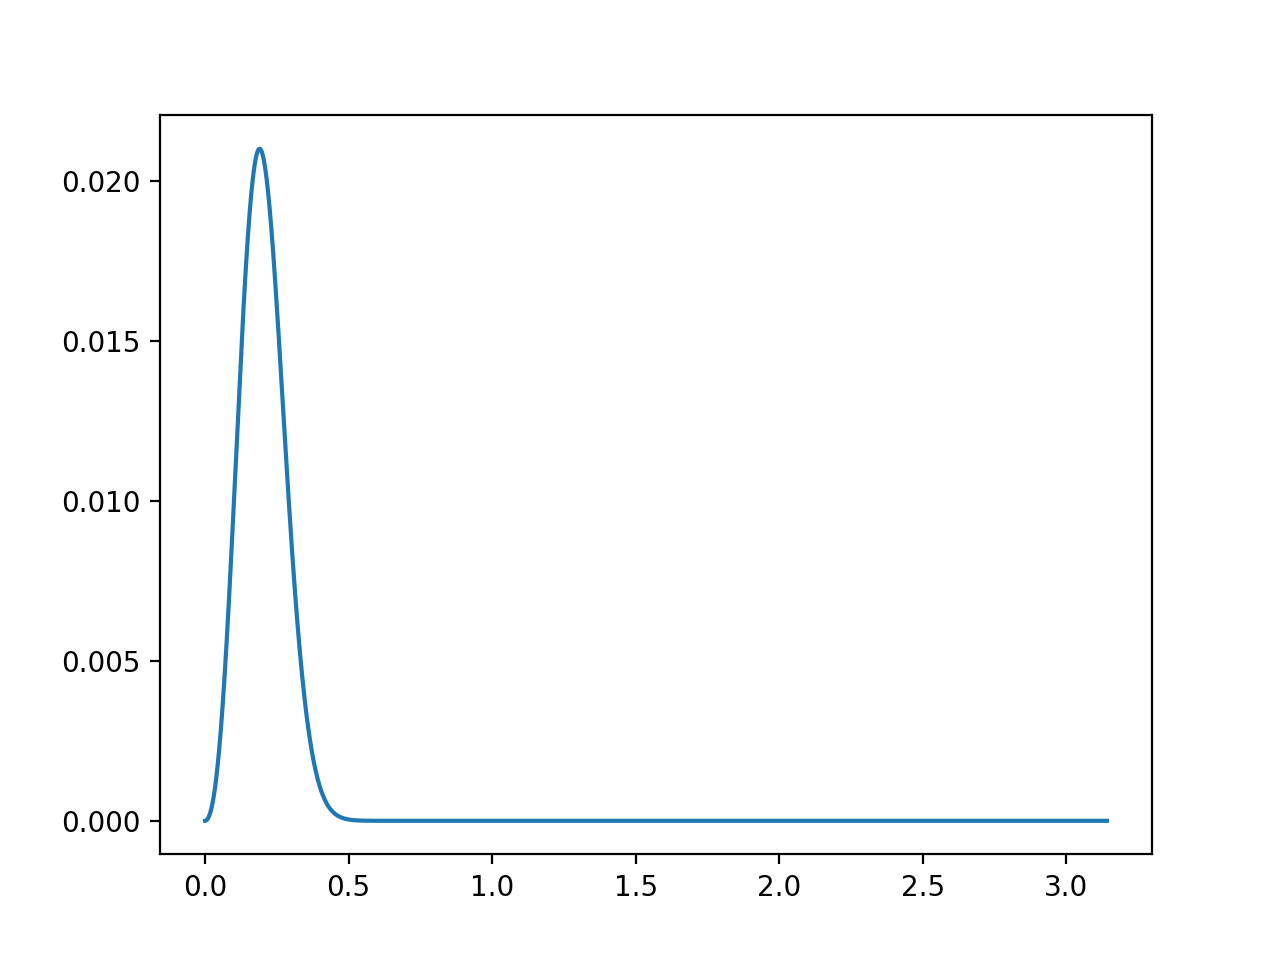

In [184]:
figure()
plot(theta,f2theta(theta,5.*pi/180.,4.*pi/180.))

In [205]:
def integrand(x,l1):
    fnpl=interp1d(np.cos(theta),pl2[l1,:],kind="cubic")
    return f2theta(x,5.*pi/180.,4.*pi/180.)*fnpl(np.cos(x))*np.cos(x)

In [206]:
cl=zeros(lmax+1,float)
for i in arange(lmax-1):
    cl[i+2]=quad(integrand,0.,pi,args=(2+i))[0]*sqrt(4.*pi/(2.*i+5))/norm(2.+i)

In [207]:
ctheta=zeros(theta.size,float)
#def cal_ctheta(cl,lmax):   
for i in arange(theta.size):
    for j in arange(lmax-1):
        l=j+2
        ctheta[i]=ctheta[i] + cl[j]*sqrt((2.*l+1)/(4.*pi))*pl2[l,i]

<IPython.core.display.Javascript object>


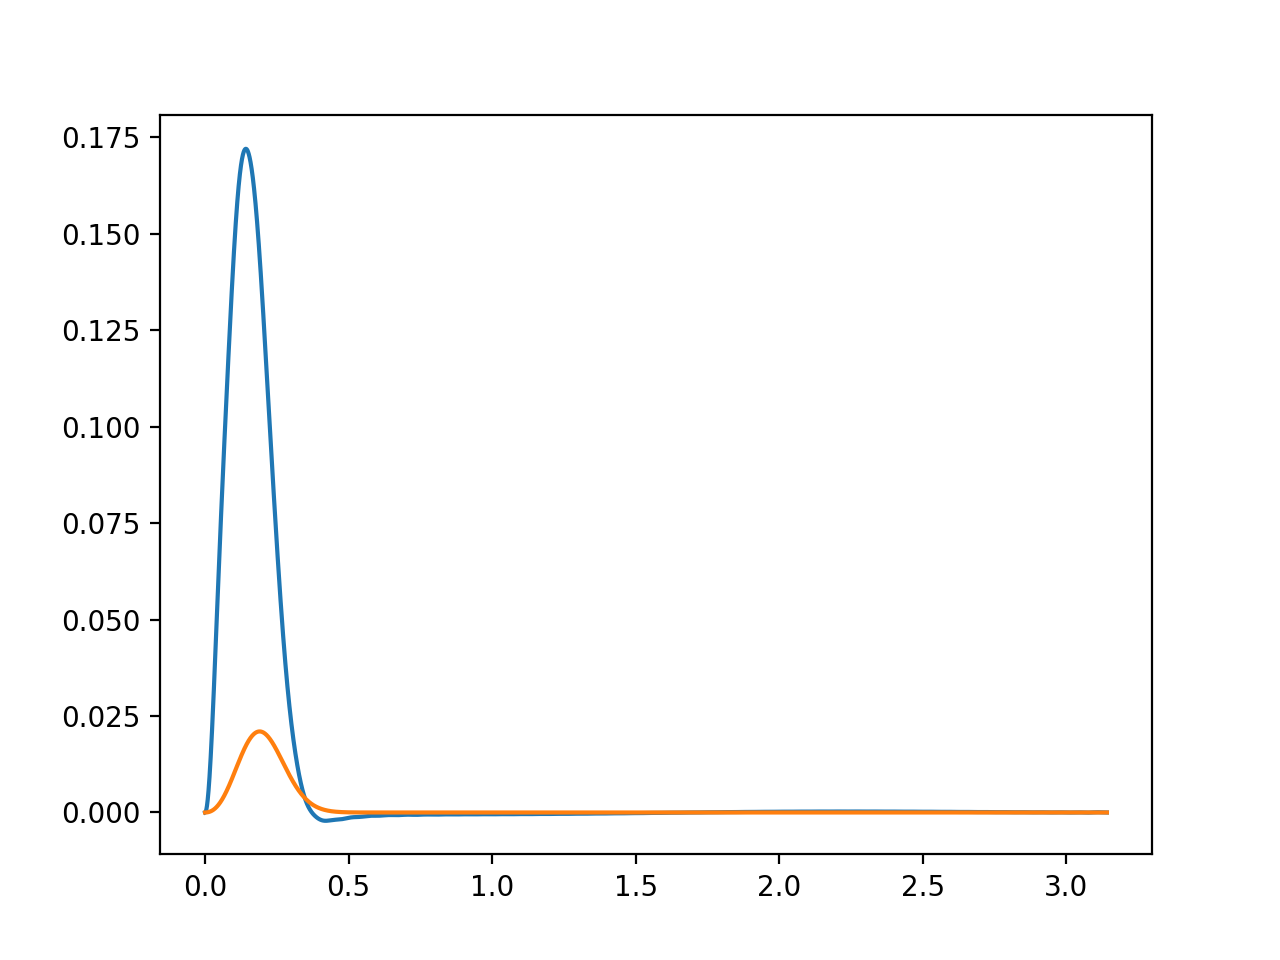

<IPython.core.display.Javascript object>


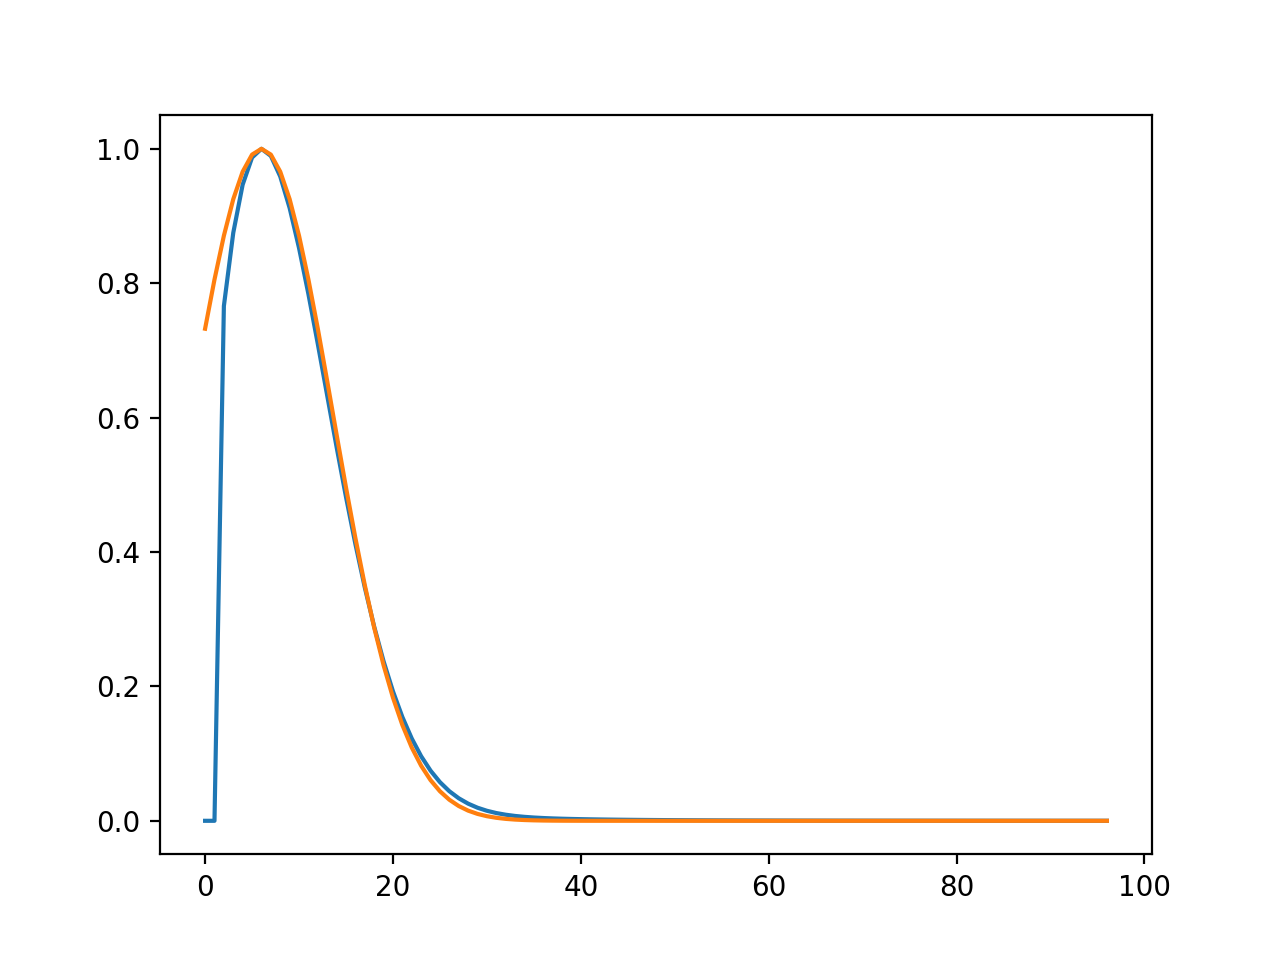

In [208]:
figure()
plot(theta,ctheta)
plot(theta,f2theta(theta,5.*pi/180.,4.*pi/180.))

figure()
plot(ell,cl/max(cl))
fl=exp(-(ell-6)**2./(2.*7.6**2.))
plot(ell,fl/max(fl))

32